#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Import machine learning libraries

In [25]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.utils.multiclass import unique_labels
from xgboost import XGBClassifier

import warnings
import category_encoders as ce

In [3]:
warnings.filterwarnings("ignore")

#### loading the dataset

In [4]:
malaria = pd.read_csv('Kenya Malaria_Prediction Dataset by who.csv')

#### creating a copy of the dataset

In [5]:
malaria_original = malaria.copy()

#### view the first 5 rows

In [6]:
malaria.head()

,Patient ID,Age,Gender,Region,Fever,Headache,Chills,Sweats,Fatigue,Hemoglobin (g/dL),Platelet (cells/μL),WBC (cells/μL),Parasite Detected,Diagnosis
0,1,52,Male,Rural,Yes,No,Yes,No,Yes,12.2,367281,10578,No,Negative
1,2,93,Male,Rural,Yes,Yes,No,Yes,Yes,11.5,261529,6367,Yes,Negative
2,3,15,Male,Rural,Yes,Yes,Yes,No,No,12.5,383009,11904,No,Negative
3,4,72,Female,Urban,Yes,No,Yes,No,No,12.7,245800,11793,No,Negative
4,5,61,Male,Rural,No,Yes,Yes,No,No,11.6,379350,10677,No,Negative


#### view the last 5 rows

In [7]:
malaria.tail()

,Patient ID,Age,Gender,Region,Fever,Headache,Chills,Sweats,Fatigue,Hemoglobin (g/dL),Platelet (cells/μL),WBC (cells/μL),Parasite Detected,Diagnosis
4995,4996,34,Male,Urban,Yes,Yes,Yes,Yes,No,14.2,393727,8527,Yes,Negative
4996,4997,73,Female,Rural,Yes,Yes,No,Yes,No,10.5,330260,11832,No,Negative
4997,4998,28,Female,Urban,No,Yes,Yes,No,No,11.8,348052,9600,No,Negative
4998,4999,11,Female,Urban,Yes,No,No,Yes,No,13.5,172406,11031,Yes,Negative
4999,5000,78,Male,Urban,Yes,No,No,No,No,14.5,334615,11456,No,Positive


#### inspecting the dataframe

In [8]:
malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient ID           5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   Gender               4994 non-null   object 
 3   Region               5000 non-null   object 
 4   Fever                4997 non-null   object 
 5   Headache             4991 non-null   object 
 6   Chills               5000 non-null   object 
 7   Sweats               5000 non-null   object 
 8   Fatigue              5000 non-null   object 
 9   Hemoglobin (g/dL)    5000 non-null   float64
 10  Platelet (cells/μL)  5000 non-null   int64  
 11  WBC (cells/μL)       5000 non-null   int64  
 12  Parasite Detected    5000 non-null   object 
 13  Diagnosis            5000 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 547.0+ KB


### Data preprocessing and Data cleaning

In [9]:
#Drop the Patient ID column
malaria.drop(columns=['Patient ID'],inplace=True)

In [10]:
#Summary statistics for numeric columns
malaria.describe()

,Age,Hemoglobin (g/dL),Platelet (cells/μL),WBC (cells/μL)
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49.398200,12.468400,273417.080000,7941.991600
std,28.677471,1.441937,72349.202378,2317.169132
min,1.000000,10.000000,150002.000000,4002.000000
25%,25.000000,11.200000,210426.750000,5951.000000
50%,49.000000,12.500000,271639.500000,7908.000000
75%,74.000000,13.700000,335890.500000,9932.000000
max,99.000000,15.000000,399974.000000,11996.000000


In [11]:
#Checking for missing values in the dataset
malaria.isnull().sum()

Age                    0
Gender                 6
Region                 0
Fever                  3
Headache               9
Chills                 0
Sweats                 0
Fatigue                0
Hemoglobin (g/dL)      0
Platelet (cells/μL)    0
WBC (cells/μL)         0
Parasite Detected      0
Diagnosis              0
dtype: int64

In [12]:
#Checking for labels in the categorical columns
columnss = ['Gender','Region','Fever','Headache','Chills', 'Sweats', 'Fatigue', 'Parasite Detected', 'Diagnosis']
for col in columnss:
    print('column :', col)
    for index, unique in enumerate(malaria[col].unique()) :
        print(unique, ':', index)
    print('_'*45)

column : Gender
Male : 0
Female : 1
nan : 2
_____________________________________________
column : Region
Rural : 0
Urban : 1
_____________________________________________
column : Fever
Yes : 0
No : 1
nan : 2
_____________________________________________
column : Headache
No : 0
Yes : 1
nan : 2
_____________________________________________
column : Chills
Yes : 0
No : 1
_____________________________________________
column : Sweats
No : 0
Yes : 1
_____________________________________________
column : Fatigue
Yes : 0
No : 1
_____________________________________________
column : Parasite Detected
No : 0
Yes : 1
_____________________________________________
column : Diagnosis
Negative : 0
Positive : 1
_____________________________________________


In [13]:
# Replacing missing values for categorical columns with the mode value in the column
malaria['Gender'] = malaria['Gender'].fillna(malaria['Gender'].mode()[0])
malaria['Fever'] = malaria['Fever'].fillna(malaria['Fever'].mode()[0])
malaria['Headache'] = malaria['Headache'].fillna(malaria['Headache'].mode()[0])

In [14]:
malaria.head(10)

,Age,Gender,Region,Fever,Headache,Chills,Sweats,Fatigue,Hemoglobin (g/dL),Platelet (cells/μL),WBC (cells/μL),Parasite Detected,Diagnosis
0,52,Male,Rural,Yes,No,Yes,No,Yes,12.2,367281,10578,No,Negative
1,93,Male,Rural,Yes,Yes,No,Yes,Yes,11.5,261529,6367,Yes,Negative
2,15,Male,Rural,Yes,Yes,Yes,No,No,12.5,383009,11904,No,Negative
3,72,Female,Urban,Yes,No,Yes,No,No,12.7,245800,11793,No,Negative
4,61,Male,Rural,No,Yes,Yes,No,No,11.6,379350,10677,No,Negative
5,21,Male,Rural,Yes,Yes,No,No,Yes,12.7,152676,11466,No,Negative
6,83,Female,Rural,Yes,No,Yes,Yes,Yes,10.5,151215,10717,Yes,Negative
7,87,Male,Urban,Yes,No,No,Yes,Yes,11.2,299933,11861,No,Negative
8,75,Female,Urban,Yes,Yes,Yes,No,No,13.7,296932,4922,No,Negative
9,75,Female,Urban,Yes,Yes,Yes,No,Yes,10.9,217800,5820,Yes,Negative


In [15]:
malaria.tail()

,Age,Gender,Region,Fever,Headache,Chills,Sweats,Fatigue,Hemoglobin (g/dL),Platelet (cells/μL),WBC (cells/μL),Parasite Detected,Diagnosis
4995,34,Male,Urban,Yes,Yes,Yes,Yes,No,14.2,393727,8527,Yes,Negative
4996,73,Female,Rural,Yes,Yes,No,Yes,No,10.5,330260,11832,No,Negative
4997,28,Female,Urban,No,Yes,Yes,No,No,11.8,348052,9600,No,Negative
4998,11,Female,Urban,Yes,No,No,Yes,No,13.5,172406,11031,Yes,Negative
4999,78,Male,Urban,Yes,No,No,No,No,14.5,334615,11456,No,Positive


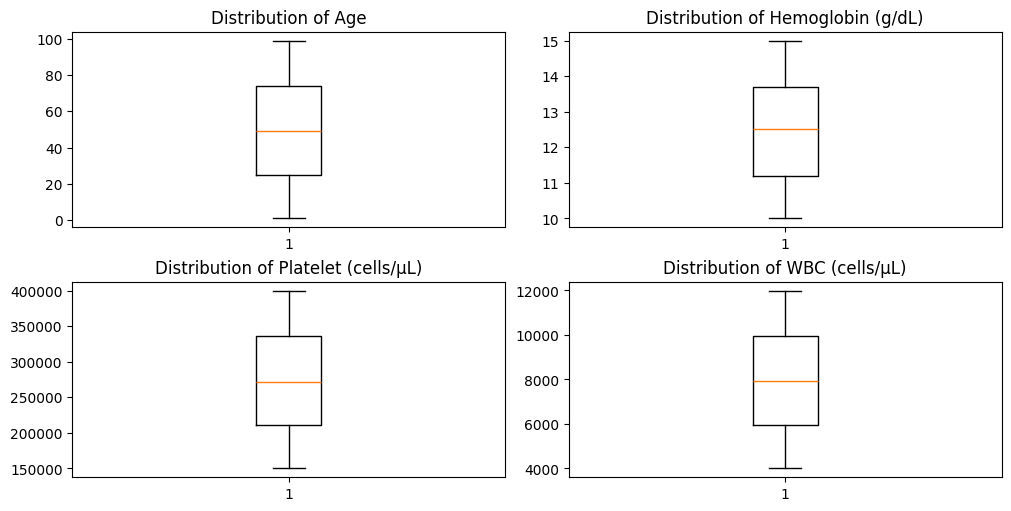

In [16]:
#Visualizing to check for possible outliers in the columns
# Create the subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 5), constrained_layout=True)

# Plot for 'Age' in the first subplot
axs[0, 0].boxplot(malaria[['Age']].dropna())  # Use .dropna() to handle missing values if necessary
axs[0, 0].set_title('Distribution of Age')

# Plot for 'Hemoglobin (g/dL)' in the second subplot
axs[0, 1].boxplot(malaria[['Hemoglobin (g/dL)']].dropna())
axs[0, 1].set_title('Distribution of Hemoglobin (g/dL)')

# Plot for 'Platelet (cells/μL)' in the third subplot
axs[1, 0].boxplot(malaria[['Platelet (cells/μL)']].dropna())
axs[1, 0].set_title('Distribution of Platelet (cells/μL)')

# Plot for 'WBC (cells/μL)' in the fourth subplot
axs[1, 1].boxplot(malaria[['WBC (cells/μL)']].dropna())
axs[1, 1].set_title('Distribution of WBC (cells/μL)')

# Show the plots
plt.show()

In [17]:
#Checking for duplicates in the dataset
malaria.duplicated().sum()

np.int64(0)

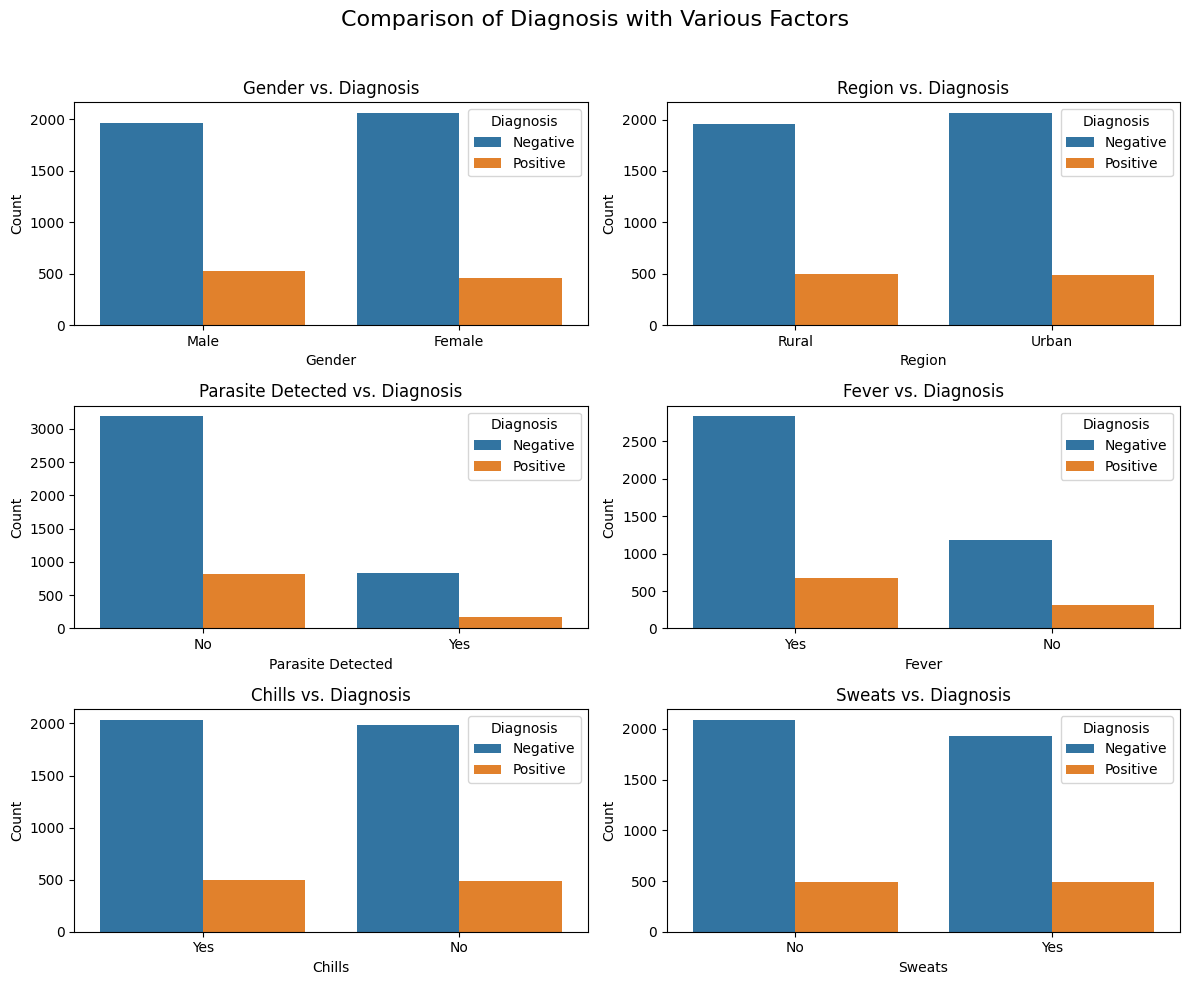

In [18]:
#Visualization of relationship between columns
# Define the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 rows, 2 columns
fig.suptitle('Comparison of Diagnosis with Various Factors', fontsize=16)

# List of variables to plot
variables = ['Gender', 'Region', 'Parasite Detected', 'Fever','Chills', 'Sweats']

i, j = 0, 0  # Row and column indices
for var in variables:
    sns.countplot(data=malaria, x=var, hue='Diagnosis', ax=axes[i, j])
    axes[i, j].set_title(f'{var} vs. Diagnosis')
    axes[i, j].set_ylabel('Count')
    
    j += 1
    if j == 2:  # Move to next row after every two plots
        i += 1
        j = 0

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [19]:
#Initialize the standard scaler
scaler = StandardScaler().set_output(transform="pandas")

In [20]:
#Replace the target column with 1 for positive and 0 for negative
malaria['Diagnosis'] = malaria['Diagnosis'].replace({'Positive': 1,'Negative': 0})
#change the data type to int
malaria['Diagnosis'] = malaria['Diagnosis'].astype(int)

In [21]:
#Defining the inputs and the output variables
X = malaria.iloc[:,0:12]
y = malaria.iloc[:,12]

In [22]:
#spliting the dataset into training set and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Scale the numeric columns columns
numeric_cols_scale = ['Age', 'Hemoglobin (g/dL)', 'Platelet (cells/μL)','WBC (cells/μL)']
X_train_numeric_scaled = scaler.fit_transform(X_train[numeric_cols_scale])
X_test_numeric_scaled = scaler.transform(X_test[numeric_cols_scale])

In [32]:
X_train_numeric_scaled.head()

,Age,Hemoglobin (g/dL),Platelet (cells/μL),WBC (cells/μL)
4227,-0.704003,-0.470325,1.684752,-0.231919
4676,-0.075522,-1.095780,-1.706925,-1.359563
800,0.203802,0.780585,-0.858766,-0.219380
3671,1.425848,-0.609315,0.500994,-0.603332
4193,1.565511,-0.400830,-0.863076,-0.573498


In [26]:
#categorical columns to encode
columns_to_encode = ['Gender', 'Region', 'Fever', 'Headache', 'Chills','Sweats','Fatigue','Parasite Detected']

In [27]:
#Initialize the one hot encoder
ohe = ce.OneHotEncoder(handle_unknown='ignore',cols = columns_to_encode, use_cat_names=True)

In [29]:
#Encode the categorical columns
X_train_encoded = ohe.fit_transform(X_train[columns_to_encode])
X_test_encoded = ohe.transform(X_test[columns_to_encode])

In [30]:
X_train_encoded.head()

,Gender_Male,Gender_Female,Region_Urban,Region_Rural,Fever_No,Fever_Yes,Headache_No,Headache_Yes,Chills_No,Chills_Yes,Sweats_Yes,Sweats_No,Fatigue_Yes,Fatigue_No,Parasite Detected_No,Parasite Detected_Yes
4227,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4676,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1
800,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1
3671,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0
4193,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0


In [51]:
#Renaming the columns names
X_train_encoded = X_train_encoded.rename(columns = {"Gender_Male": "Male", "Gender_Female": "Female",
                                      "Region_Urban": "Urban", "Region_Rural": "Rural"})

X_test_encoded = X_test_encoded.rename(columns = {"Gender_Male": "Male", "Gender_Female": "Female",
                                      "Region_Urban": "Urban", "Region_Rural": "Rural"})

In [35]:
#Merge the X_train together,X_test together
X_train_merge = pd.concat([X_train_numeric_scaled,X_train_encoded],axis=1)
X_test_merge = pd.concat([X_test_numeric_scaled,X_test_encoded],axis=1)

In [40]:
#Apply PCA
number_of_components = 20
pca = PCA(n_components=number_of_components)
X_train_pca = pca.fit_transform(X_train_merge)  # Fit PCA on training data
X_test_pca = pca.transform(X_test_merge) 

In [41]:
#Explained variance
variance_exp = pca.explained_variance_ratio_
variance_exp

array([1.32356701e-01, 1.31451107e-01, 1.30194816e-01, 1.27542726e-01,
       6.64048188e-02, 6.59947836e-02, 6.53274514e-02, 6.38483477e-02,
       6.13783876e-02, 6.06092569e-02, 5.42595682e-02, 4.06320356e-02,
       2.48222285e-17, 1.13423348e-17, 4.52128949e-18, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [42]:
# Get the names of EACH principal components
most_important_features = [np.abs(pca.components_[i]).argmax() for i in range(number_of_components)]
initial_feature_names = X_train_merge.columns
most_important_names = [initial_feature_names[most_important_features[i]] for i in range(number_of_components)]

# Explaining the Variance Ratios for each Principal Component
num = 1
for i in range(len(variance_exp)):
    print(f"PC{num} ({most_important_names[i]}) explains {round(variance_exp[i]*100,3)}% of the Variance.")
    num += 1

PC1 (Age) explains 13.236% of the Variance.
PC2 (Hemoglobin (g/dL)) explains 13.145% of the Variance.
PC3 (WBC (cells/μL)) explains 13.019% of the Variance.
PC4 (Age) explains 12.754% of the Variance.
PC5 (Region_Rural) explains 6.64% of the Variance.
PC6 (Gender_Male) explains 6.599% of the Variance.
PC7 (Chills_No) explains 6.533% of the Variance.
PC8 (Sweats_No) explains 6.385% of the Variance.
PC9 (Fatigue_Yes) explains 6.138% of the Variance.
PC10 (Headache_No) explains 6.061% of the Variance.
PC11 (Fever_No) explains 5.426% of the Variance.
PC12 (Parasite Detected_No) explains 4.063% of the Variance.
PC13 (Chills_No) explains 0.0% of the Variance.
PC14 (Sweats_No) explains 0.0% of the Variance.
PC15 (Fatigue_No) explains 0.0% of the Variance.
PC16 (Parasite Detected_Yes) explains 0.0% of the Variance.
PC17 (Region_Rural) explains 0.0% of the Variance.
PC18 (Headache_Yes) explains 0.0% of the Variance.
PC19 (Gender_Female) explains 0.0% of the Variance.
PC20 (Fever_Yes) explains 0

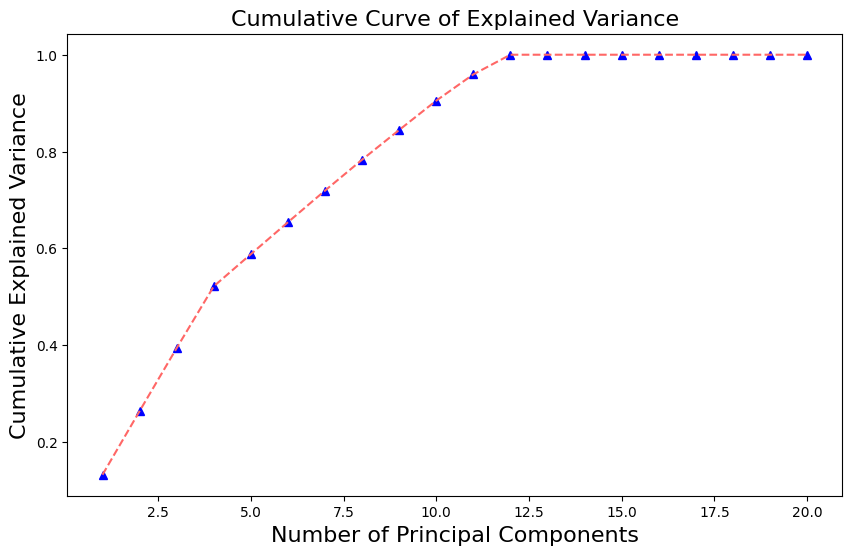

In [43]:
# Plotting the Cumulative Curve of Explained Variance
cum_var_exp = np.cumsum(variance_exp)
plt.figure(figsize = (10, 6))
nc = np.arange(1, variance_exp.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'b^')
plt.plot(nc, cum_var_exp, '--r', color='#FF6766')
plt.xlabel('Number of Principal Components', fontsize=16)
plt.ylabel('Cumulative Explained Variance', fontsize=16)
plt.title('Cumulative Curve of Explained Variance', fontsize=16)
plt.show()

In [44]:
# Define pipeline for classification
pipe = Pipeline([
    ('classifier', KNeighborsClassifier())
])

# Define hyperparameters grid for classification
param_grid = [
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [5, 2, 3, 4, 6, 7],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'classifier__leaf_size': [20, 10, 15, 25, 35, 5],
        'classifier__p': [1, 2]
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__n_estimators': [30, 70, 120, 180],
        'classifier__learning_rate': [0.03, 0.15, 0.25],
        'classifier__max_depth': [4, 5, 10],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [DecisionTreeClassifier(random_state=42)],
        'classifier__splitter': ["best", "random"],
        'classifier__max_depth': [None, 5, 10, 20, 30],
        'classifier__min_samples_leaf': [1,2, 4, 7, 5],
        'classifier__min_samples_split': [2, 3, 4,6],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__class_weight': [None, 'balanced']
    }
]

In [45]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(pipe, 
                                 param_grid, 
                                 cv=5, 
                                 scoring='neg_mean_absolute_error', 
                                 n_jobs=-1,
                                 error_score='raise')

In [46]:
random_search.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('classifier',
                                              KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions=[{'classifier': [KNeighborsClassifier()],
                                         'classifier__algorithm': ['auto',
                                                                   'ball_tree',
                                                                   'kd_tree',
                                                                   'brute'],
                                         'classifier__leaf_size': [20, 10, 15,
                                                                   25, 35, 5],
                                         'classifier__n_neighbors': [5, 2, 3, 4,
                                                                     6, 7],
                                         'classifier__p': [1, 2],
                                         'c...
                                        {'classifier': [DecisionTreeClassifier(random_state=42)],
                                         'classifier__class_weight': [None,
                                                                      'balanced'],
                                         'classifier__max_depth': [None, 5, 10,
                                                                   20, 30],
                                         'classifier__max_features': ['sqrt',
                                                                      'log2',
                                                                      None],
                                         'classifier__min_samples_leaf': [1, 2,
                                                                          4, 7,
                                                                          5],
                                         'classifier__min_samples_split': [2, 3,
                                                                           4,
                                                                           6],
                                         'classifier__splitter': ['best',
                                                                  'random']}],
                   scoring='neg_mean_absolute_error')

In [47]:
# Print best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'classifier__splitter': 'random', 'classifier__min_samples_split': 4, 'classifier__min_samples_leaf': 7, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 5, 'classifier__class_weight': None, 'classifier': DecisionTreeClassifier(random_state=42)}


In [48]:
# Convert search results to DataFrame
results_df = pd.DataFrame(random_search.cv_results_)
print(results_df[['param_classifier', 'mean_test_score']])

                              param_classifier  mean_test_score
0      DecisionTreeClassifier(random_state=42)         -0.48300
1  GradientBoostingClassifier(random_state=42)         -0.20050
2      DecisionTreeClassifier(random_state=42)         -0.19750
3  GradientBoostingClassifier(random_state=42)         -0.20150
4                       KNeighborsClassifier()         -0.27100
5      DecisionTreeClassifier(random_state=42)         -0.48775
6      DecisionTreeClassifier(random_state=42)         -0.42525
7                       KNeighborsClassifier()         -0.23400
8      DecisionTreeClassifier(random_state=42)         -0.21650
9  GradientBoostingClassifier(random_state=42)         -0.20475


In [49]:
# Filter best parameters for KNeighborsClassifier
knn_results = results_df[results_df['param_classifier'].astype(str).str.contains('KNeighborsClassifier')]

# Get the best set of hyperparameters for KNeighborsClassifier
best_knn_params = knn_results.loc[knn_results['mean_test_score'].idxmax(), 'params']
print("Best parameters for KNeighborsClassifier:", best_knn_params)

Best parameters for KNeighborsClassifier: {'classifier__weights': 'distance', 'classifier__p': 2, 'classifier__n_neighbors': 5, 'classifier__leaf_size': 20, 'classifier__algorithm': 'kd_tree', 'classifier': KNeighborsClassifier()}


In [50]:
# Filter best parameters for DecisionTreeClassifier
dt_results = results_df[results_df['param_classifier'].astype(str).str.contains('DecisionTreeClassifier')]

# Get the best set of hyperparameters for DecisionTreeClassifier
best_dt_params = dt_results.loc[dt_results['mean_test_score'].idxmax(), 'params']
print("Best parameters for DecisionTreeClassifier:", best_dt_params)

Best parameters for DecisionTreeClassifier: {'classifier__splitter': 'random', 'classifier__min_samples_split': 4, 'classifier__min_samples_leaf': 7, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 5, 'classifier__class_weight': None, 'classifier': DecisionTreeClassifier(random_state=42)}


In [51]:
#Perform stacking 
#setup the three algorithms with their best parameters
estimators = [
    ('knc', KNeighborsClassifier(weights='distance',p=2,n_neighbors=6,leaf_size=35,algorithm='ball_tree')),
    ('drc', DecisionTreeClassifier(splitter="random",min_samples_split=4,min_samples_leaf=4,max_features='sqrt',max_depth=10,class_weight=None,random_state=42)),
    ('gbc',GradientBoostingClassifier(learning_rate=0.03, max_depth=4, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=120,
                           random_state=42))
]

In [52]:
#combine the three base model with stacking classifier
stackclassifier = StackingClassifier(
    estimators=estimators, final_estimator=GradientBoostingClassifier()
)

In [53]:
#fit the stacking classifier on the X_train_pca
stackclassifier.fit(X_train_pca, y_train)

StackingClassifier(estimators=[('knc',
                                KNeighborsClassifier(algorithm='ball_tree',
                                                     leaf_size=35,
                                                     n_neighbors=6,
                                                     weights='distance')),
                               ('drc',
                                DecisionTreeClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_leaf=4,
                                                       min_samples_split=4,
                                                       random_state=42,
                                                       splitter='random')),
                               ('gbc',
                                GradientBoostingClassifier(learning_rate=0.03,
                                                           max_depth=4,
                                                           min_samples_leaf=2,
                                                           min_samples_split=10,
                                                           n_estimators=120,
                                                           random_state=42))],
                   final_estimator=GradientBoostingClassifier())

In [55]:
#make the prediction with the stacking classfier
ypred = stackclassifier.predict(X_test_pca)

In [56]:
#test the accuracy of the model
accuracy_score(y_test,ypred)

0.802

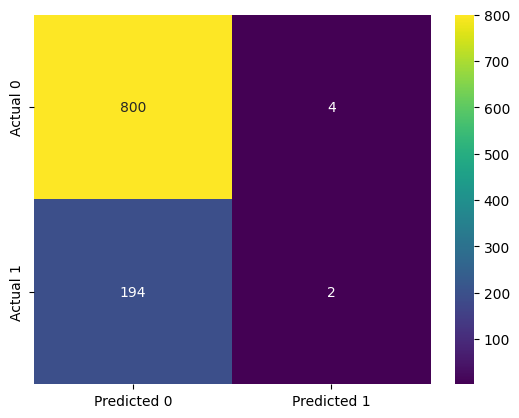

In [68]:
# plot of confusion matrix in heatmap
labels = unique_labels(y_test)
column = [f'Predicted {label}' for label in labels]
indices = [f'Actual {label}' for label in labels]
table = pd.DataFrame(confusion_matrix(y_test, ypred), 
                   columns=column, index=indices)

sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
plt.show()

In [65]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       804
           1       0.33      0.01      0.02       196

    accuracy                           0.80      1000
   macro avg       0.57      0.50      0.45      1000
weighted avg       0.71      0.80      0.72      1000



In [58]:
#select the best model from randomizedsearchcv
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                                        min_samples_leaf=7, min_samples_split=4,
                                        random_state=42, splitter='random'))])

In [59]:
#make the prediction from the best model
y_pred = best_model.predict(X_test_pca)

In [60]:
#test the accuracy of the best model
AccuracyScore = accuracy_score(y_test,y_pred)
AccuracyScore

0.804

In [61]:
#Print the confusion matrix 
labels = unique_labels(y_test)
columns = [f'Predicted {label}' for label in labels]
index = [f'Actual {label}' for label in labels]
pd.DataFrame(confusion_matrix(y_test, y_pred), 
                     columns=columns, index=index)

,Predicted 0,Predicted 1
Actual 0,804,0
Actual 1,196,0


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       804
           1       0.00      0.00      0.00       196

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.45      1000
weighted avg       0.65      0.80      0.72      1000



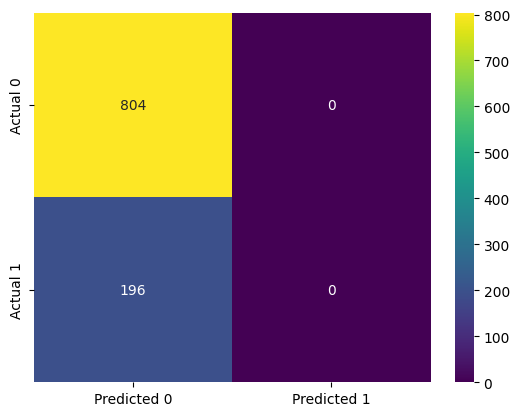

In [64]:
# plot of confusion matrix in heatmap
labels = unique_labels(y_test)
column = [f'Predicted {label}' for label in labels]
indices = [f'Actual {label}' for label in labels]
table = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                   columns=column, index=indices)

sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
plt.show()

In [69]:
#Feature importance
best_model = random_search.best_estimator_
columns = ['Age', 'Gender', 'Region', 'Fever', 'Headache', 'Chills', 'Sweats',
       'Fatigue', 'Hemoglobin (g/dL)', 'Platelet (cells/μL)', 'WBC (cells/μL)',
       'Parasite Detected']
classifier = best_model.named_steps['classifier']
feature_importances = classifier.feature_importances_

In [71]:
# dataframe = pd.Series(feature_importances, columns)
# %matplotlib inline
# dataframe.sort_values().plot.barh(color='purple');